# EK121 Final Project, Fall 2023

*Title:*

Social Security Disability Requests Vary by Northern vs. Southern States in the USA

*Submitted Date:*

Oct. 16, 2023

-------------


*My name and Boston University email address*, as a tuple:

In [5]:
myname = ("Andrew Sabelhaus", "asabelha@bu.edu")

*My teammates' names and Boston University email addresses, as tuples:*

In [6]:
teammate1 = ("Jeffrey Carruthers", "jbc@bu.edu")

In [7]:
teammate2 = ("Jacob Norman", "jfnorman@bu.edu")

In [8]:
teammate3 = ()

-------------

*Summary:*

Something about Social Security Disability and why it's important. Some dataset could answer an important question for us. We used data this-or-that. Our analysis...

--insert-your-project-here--

### Hypothesis 1 : General Global Labor Trends

In [ ]:
import numpy as np #numpy maybe not needed
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_url = "https://www.dropbox.com/s/ie1zvkr7iht2i1j/public_workingtimedata.dta?dl=1" # store data url here

df = pd.read_stata(data_url) # data is a stata file, so use read_stata to get dataframe set up
#df.to_csv('./csv.csv') # test used so we can look at raw data and as CSV instead of .dta/stata
#not much cleaning required

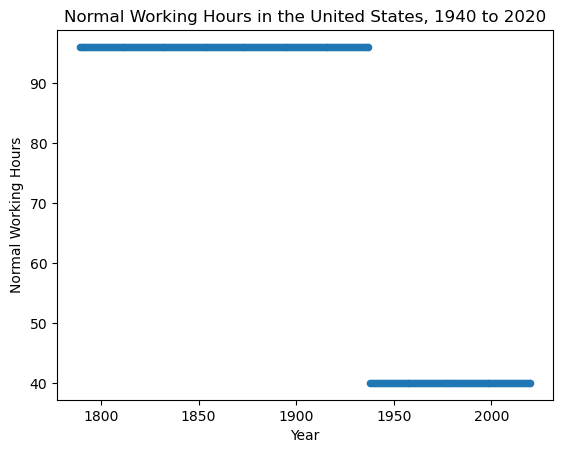

In [4]:
df_by_year = df.sort_values(["year"]) # sort everything by year
df_US = df.loc[df['country_name'] == "United States of America"] # get only the USA labor hours data

df_US_hours = df_US[["country_name", "year", "normalhours"]] # only get these columns 
df_US_hours.plot.scatter(x="year", y="normalhours") # plot the year vs. normal working hours

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Normal Working Hours in the United States, 1940 to 2020')

plt.show()


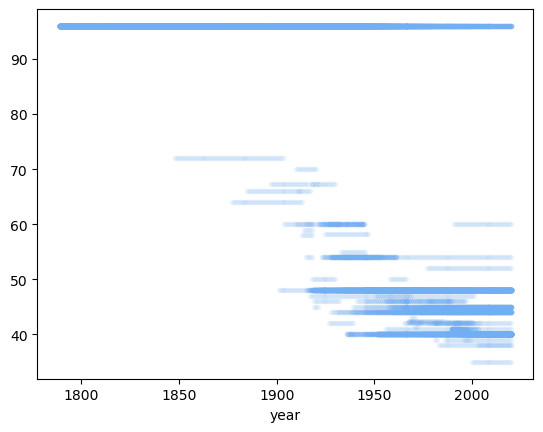

In [26]:
pd.pivot_table(df.reset_index(), index='year', columns='country_name', values='normalhours').plot(legend=None, alpha=0.1, linestyle='None', marker='.', color="#72aef2") # https://www.statology.org/pandas-groupby-plot/
plt.show()

In [23]:
#look at fewer countries here to illustrate a sort of trend more simply (like 4-6 countries)

### Hypothesis 2: Overtime hours and Work Culture

In [25]:
# plot 1: 


In [ ]:

df_JP = df.loc[df['country_name'] == "Japan"]
df_JP_hours = df_JP[["country_name", "year", "hours_max"]]
print(df_JP_hours)

df_2020 = df.loc[df["year"] == 2020]
df_2020.plot.scatter(x="normalhours", y="hours_max")